In [ ]:
!pip install --upgrade pip
!pip install --upgrade keras-cv tensorflow
!pip install numpy matplotlib


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.8/1.8 MB 13.1 MB/s eta 0:00:00
  Attempting uninstall: pip
    Found existing installation: pip 24.1.2
    Uninstalling pip-24.1.2:
      Successfully uninstalled pip-24.1.2
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 650.7/650.7 kB 6.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 950.8/950.8 kB 10.2 MB/s eta 0:00:00


In [ ]:
import tensorflow as tf
import keras_cv
import keras
import numpy as np
import matplotlib.pyplot as plt


# Verify TensorFlow and KerasCV versions
print("TensorFlow version:", tf.__version__)
print("KerasCV version:", keras_cv.__version__)


TensorFlow version: 2.17.0
KerasCV version: 0.9.0


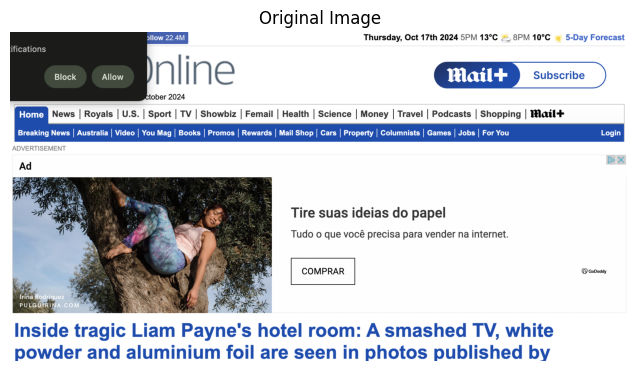

Image shape after resizing: (1, 640, 640, 3)


Model: "yolov8_detector_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)              ┃ Output Shape           ┃        Param # ┃ Connected to           ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer_7             │ (None, None, None, 3)  │              0 │ -                      │
│ (InputLayer)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ functional_3 (Functional) │ [(None, None, None,    │     11,872,464 │ input_layer_7[0][0]    │
│                           │ 192), (None, None,     │                │                        │
│                           │ None, 384), (None,     │                │                        │
│                           │ None, None, 576)]      │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ repeat_12 (Repeat)        │ (None, None, None,     │              0 │ functional_3[0][2]     │
│                           │ 576)                   │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ repeat_13 (Repeat)        │ (None, None, None,     │              0 │ repeat_12[0][0]        │
│                           │ 576)                   │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ concatenate_56            │ (None, None, None,     │              0 │ repeat_13[0][0],       │
│ (Concatenate)             │ 960)                   │                │ functional_3[0][1]     │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ pa_fpn_p4p5_pre_conv      │ (None, None, None,     │        368,640 │ concatenate_56[0][0]   │
│ (Conv2D)                  │ 384)                   │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ pa_fpn_p4p5_pre_bn        │ (None, None, None,     │          1,536 │ pa_fpn_p4p5_pre_conv[… │
│ (BatchNormalization)      │ 384)                   │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ pa_fpn_p4p5_pre           │ (None, None, None,     │              0 │ pa_fpn_p4p5_pre_bn[0]… │
│ (Activation)              │ 384)                   │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ split_28 (Split)          │ [(None, None, None,    │              0 │ pa_fpn_p4p5_pre[0][0]  │
│                           │ 192), (None, None,     │                │                        │
│                           │ None, 192)]            │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ pa_fpn_p4p5_pre_0_1_pad   │ (None, None, None,     │              0 │ split_28[0][1]         │
│ (ZeroPadding2D)           │ 192)                   │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ pa_fpn_p4p5_pre_0_1_conv  │ (None, None, None,     │        331,776 │ pa_fpn_p4p5_pre_0_1_p… │
│ (Conv2D)                  │ 192)                   │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ pa_fpn_p4p5_pre_0_1_bn    │ (None, None, None,     │            768 │ pa_fpn_p4p5_pre_0_1_c… │
│ (BatchNormalization)      │ 192)                   │                │                        │
├──────────────────────

 Total params: 25,901,004 (98.80 MB)

 Trainable params: 25,867,884 (98.68 MB)

 Non-trainable params: 33,120 (129.38 KB)

1/1 ━━━━━━━━━━━━━━━━━━━━ 5s 5s/step
{'boxes': array([[[168.43127 , 332.5501  ,  53.791992, 213.0794  ],
        [ -1.      ,  -1.      ,  -1.      ,  -1.      ],
        [ -1.      ,  -1.      ,  -1.      ,  -1.      ],
        [ -1.      ,  -1.      ,  -1.      ,  -1.      ],
        [ -1.      ,  -1.      ,  -1.      ,  -1.      ],
        [ -1.      ,  -1.      ,  -1.      ,  -1.      ],
        [ -1.      ,  -1.      ,  -1.      ,  -1.      ],
        [ -1.      ,  -1.      ,  -1.      ,  -1.      ],
        [ -1.      ,  -1.      ,  -1.      ,  -1.      ],
        [ -1.      ,  -1.      ,  -1.      ,  -1.      ],
        [ -1.      ,  -1.      ,  -1.      ,  -1.      ],
        [ -1.      ,  -1.      ,  -1.      ,  -1.      ],
        [ -1.      ,  -1.      ,  -1.      ,  -1.      ],
        [ -1.      ,  -1.      ,  -1.      ,  -1.      ],
        [ -1.      ,  -1.      ,  -1.      ,  -1.      ],
        [ -1.      ,  -1.      ,  -1.      ,  -1.      ],
        [ -1.      ,  -1. 

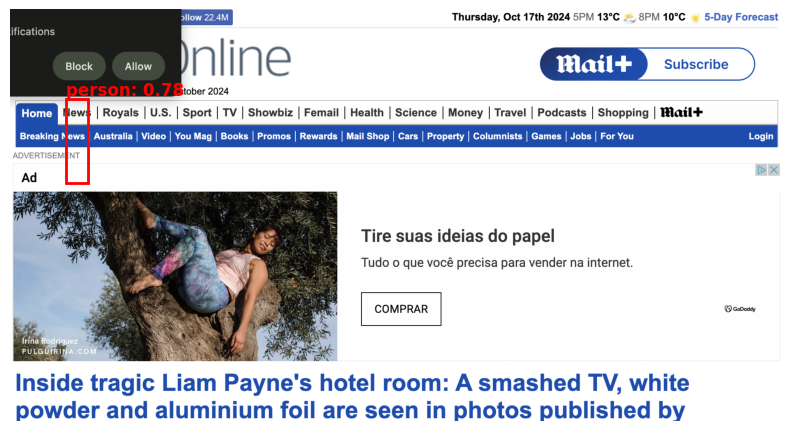

In [ ]:

# Step 3: Load and Display the Image
image_path = "/content/screenshot.png"  # Ensure this is the correct path
image = np.array(keras.utils.load_img(image_path))

plt.figure(figsize=(8, 8))
plt.imshow(image)
plt.title("Original Image")
plt.axis("off")
plt.show()

# Step 4: Resize the Image Using TensorFlow and Cast to float32
image_resized = tf.image.resize(image, [640, 640])[None, ...]  # Add batch dimension
image_resized = tf.cast(image_resized, tf.float32)  # Correctly cast to float32
print("Image shape after resizing:", image_resized.shape)

# Step 5: Load the Pre-trained YOLOv8 Model
model = keras_cv.models.YOLOV8Detector.from_preset(
    "yolo_v8_m_pascalvoc",
    bounding_box_format="xywh",
)

# (Optional) Display model summary
model.summary()

# Step 6: Run Inference
predictions = model.predict(image_resized)
print(predictions)

# Step 7: Define Class Names for Pascal VOC
class_names = [
    "aeroplane", "bicycle", "bird", "boat", "bottle",
    "bus", "car", "cat", "chair", "cow",
    "diningtable", "dog", "horse", "motorbike", "person",
    "pottedplant", "sheep", "sofa", "train", "tvmonitor"
]

# Step 8: Define the Updated Visualization Function with Confidence Threshold
def display_image_with_boxes(image, boxes, confidences, classes, num_detections, class_names, confidence_threshold=0.5):
    import matplotlib.patches as patches

    plt.figure(figsize=(10, 10))
    plt.imshow(image)
    ax = plt.gca()

    # Iterate through each detection
    for i in range(num_detections[0]):
        confidence = confidences[0][i]
        if confidence < confidence_threshold:
            continue  # Skip detections below the threshold

        box = boxes[0][i]  # (x_center, y_center, width, height)
        class_idx = classes[0][i]

        # Convert (x_center, y_center, width, height) to (x_min, y_min, width, height)
        x_center, y_center, width, height = box
        x_min = x_center - (width / 2)
        y_min = y_center - (height / 2)

        # Get class name
        if class_idx >= 0 and class_idx < len(class_names):
            class_name = class_names[class_idx]
        else:
            class_name = "Unknown"

        # Create a Rectangle patch
        rect = patches.Rectangle(
            (x_min, y_min),
            width,
            height,
            linewidth=2,
            edgecolor='red',
            facecolor='none'
        )
        ax.add_patch(rect)

        # Add label with class name and confidence
        ax.text(
            x_min,
            y_min - 10,
            f"{class_name}: {confidence:.2f}",
            color='red',
            fontsize=12,
            weight='bold'
        )

    plt.axis('off')
    plt.show()

# Step 9: Extract Prediction Components
boxes = predictions['boxes']
confidences = predictions['confidence']
classes = predictions['classes']
num_detections = predictions['num_detections']

# Step 10: Display the Image with Bounding Boxes
display_image_with_boxes(image, boxes, confidences, classes, num_detections, class_names, confidence_threshold=0.5)
